# Fitting a M-dimensional TT-model to toy data

In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import utils as utl
import time
tfd = tfp.distributions
tfm = tf.math
import data as d
import models as m
from tqdm import tqdm

### Load data

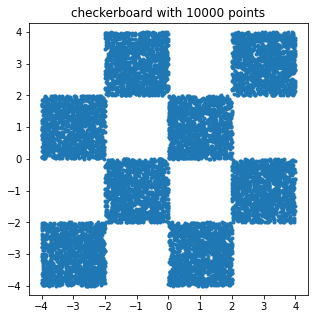

In [2]:
N = 10000
data_names = d.fjjordDataNames()
name = data_names[7]

data = d.get_ffjordData(name,batch_size=N)

# Inspect the data
f,ax = plt.subplots(figsize=(5,5))
ax.plot(data[:, 0], data[:, 1], '.')
ax.axis('equal')
ax.set_title(name + f' with {N} points')
plt.show()

# Split into batches
batch_size = 100
dataset = d.to_tf_dataset(data, batch_size=batch_size)

### Define models

In [3]:
K = 8 # Number of components
M = 2 # Dimension of data
model = m.TensorTrainGaussian(K, M,seed = 2)

### Define training parameters

In [4]:
EPOCHS = 1000
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

### Train the M-dim model

In [ ]:
losses = []
start_time = time.time()
for epoch in tqdm(range(EPOCHS),desc='Training TT'):    
    loss = 0
    for i,x in enumerate(dataset):
        loss += model.train_step(x,optimizer) 
    losses.append(loss.numpy()/len(dataset))
        
end_time = time.time()
print(f'Training time elapsed: {int(end_time-start_time)} seconds')
print(f'Final loss: {losses[-1]}')

Training TT:  92%|████████████████████████  | 924/1000 [01:25<00:06, 10.90it/s]

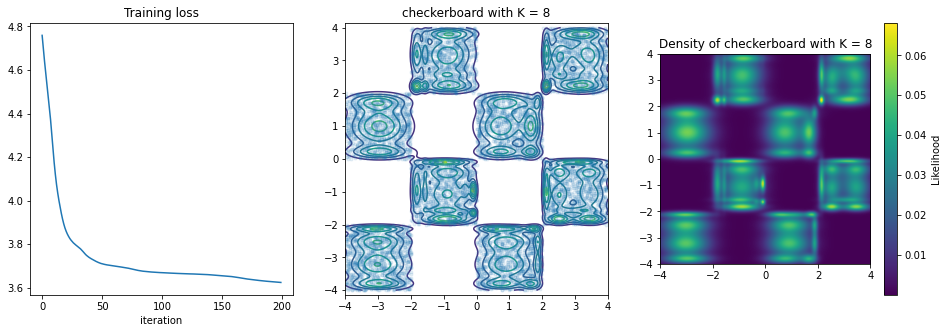

Density integrates to 1.0
It should be = 1.0


In [9]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(len(losses)),np.array(losses))
ax[0].set_title('Training loss')
ax[0].set_xlabel('iteration')
utl.plot_contours(ax[1], data, model,alpha=0.1)
ax[1].set_title(name+' with K = '+str(K))
utl.plot_density(ax[2], model)
ax[2].set_title('Density of '+name+' with K = '+str(K))
plt.show()

integrand = utl.unitTest(model,limits=[-6,6])
print(f'Density integrates to {round(integrand,4)}')
print('It should be = 1.0')